In [ ]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [ ]:
from google.colab import drive

#drive.mount('/content/drive')
path = "drive/MyDrive/ColabNotebooks/football_data.csv"
data = pd.read_csv(path)
print(data)

       Unnamed: 0      ID  ... GKReflexes  Release Clause
0               0  158023  ...        8.0         €226.5M
1               1   20801  ...       11.0         €127.1M
2               2  190871  ...       11.0         €228.1M
3               3  193080  ...       94.0         €138.6M
4               4  192985  ...       13.0         €196.4M
...           ...     ...  ...        ...             ...
18202       18202  238813  ...        9.0           €143K
18203       18203  243165  ...       12.0           €113K
18204       18204  241638  ...       13.0           €165K
18205       18205  246268  ...        9.0           €143K
18206       18206  246269  ...        9.0           €165K

[18207 rows x 89 columns]


In [ ]:
# Implement k-means clustering algorithm from scratch.
data.columns
#removing irrelevant columns (here Unnamed Column)
if('Unnamed: 0' in data.columns):
  data.drop('Unnamed: 0', axis=1, inplace=True)
data.columns

#removing unnecessary or empty entries
indexes = []
for index,rows in data.iterrows():
  if rows['LS'] != rows['LS']:
    indexes.append(index)
print(len(indexes))

data = data.drop(data.index[indexes])
data.reset_index(drop=True, inplace=True)
data_copy = data
data.shape



2085


(16122, 88)

In [ ]:
#cleaning data

  #altering values of  all positioncloumns
positions = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB',
             'LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']

def position(val):
  #print(val)
  val = val.split('+')
  val = float(val[0]) + float(val[1])
  return val

for pos in positions:
  data[pos] = data[pos].apply(position)
  print(data[pos]);

0        90.0
1        94.0
2        87.0
3        85.0
4        86.0
         ... 
16117    44.0
16118    47.0
16119    47.0
16120    49.0
16121    45.0
Name: LS, Length: 16122, dtype: float64
0        90.0
1        94.0
2        87.0
3        85.0
4        86.0
         ... 
16117    44.0
16118    47.0
16119    47.0
16120    49.0
16121    45.0
Name: ST, Length: 16122, dtype: float64
0        90.0
1        94.0
2        87.0
3        85.0
4        86.0
         ... 
16117    44.0
16118    47.0
16119    47.0
16120    49.0
16121    45.0
Name: RS, Length: 16122, dtype: float64
0        94.0
1        92.0
2        92.0
3        90.0
4        92.0
         ... 
16117    46.0
16118    41.0
16119    47.0
16120    49.0
16121    47.0
Name: LW, Length: 16122, dtype: float64
0        95.0
1        93.0
2        92.0
3        90.0
4        91.0
         ... 
16117    46.0
16118    44.0
16119    48.0
16120    48.0
16121    46.0
Name: LF, Length: 16122, dtype: float64
0        95.0
1        93.0
2 

In [ ]:
#altering values of Cloumn Wage,Value,Weight

import re
def fixsuffixes(val,namee):
  
  if ((namee == "Weight") and (type(val) == str)):
    
    return float(val.replace('lbs',''))

  if ((namee == "Wage") or (namee == "Value")):
    # print(val,namee)
    if (val!= val):
      return 0
    if (type(val) == str):
      val=re.sub('[^A-Z0-9\.]','',val)
      if val[-1] not in ['K','M']:
        return 0
      else:
        if val[-1] in ['M']:
          
          return float(val[:-1])*1000000
        else:
          return float(val[:-1])*1000

def allalters():
  cols = ["Value","Wage","Weight"]
  for i in cols:
    # print (i)
    data[i]=data[i].apply(fixsuffixes,args=(i,))
    print(data[i])
allalters()





0        110500000.0
1         77000000.0
2        118500000.0
3        102000000.0
4         93000000.0
            ...     
16117        60000.0
16118        60000.0
16119        60000.0
16120        60000.0
16121        60000.0
Name: Value, Length: 16122, dtype: float64
0        565000.0
1        405000.0
2        290000.0
3        355000.0
4        340000.0
           ...   
16117      1000.0
16118      1000.0
16119      1000.0
16120      1000.0
16121      1000.0
Name: Wage, Length: 16122, dtype: float64
0        159.0
1        183.0
2        150.0
3        154.0
4        163.0
         ...  
16117    134.0
16118    170.0
16119    148.0
16120    154.0
16121    176.0
Name: Weight, Length: 16122, dtype: float64


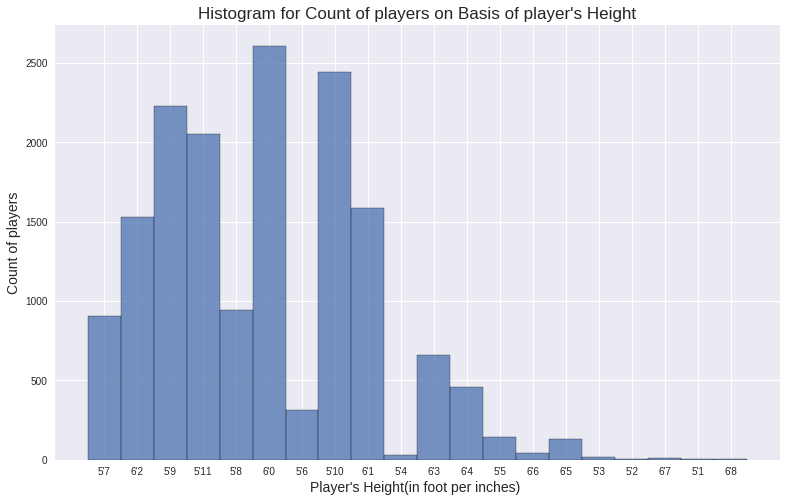

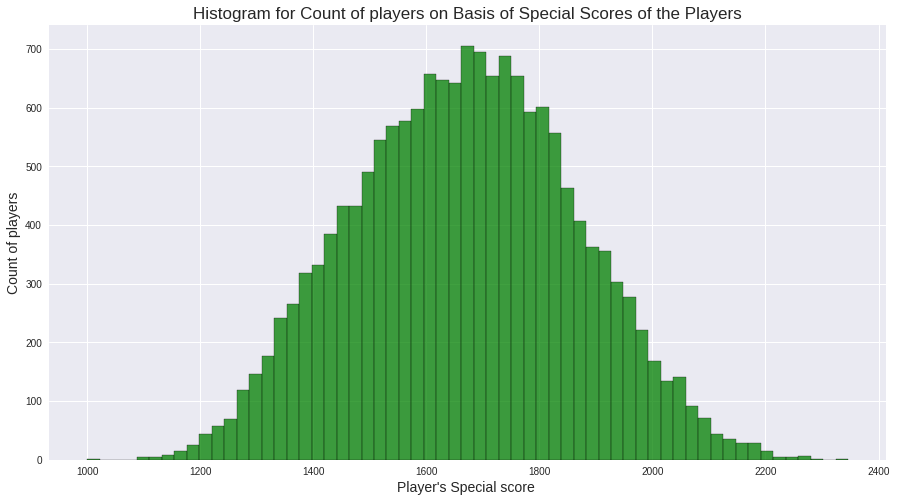

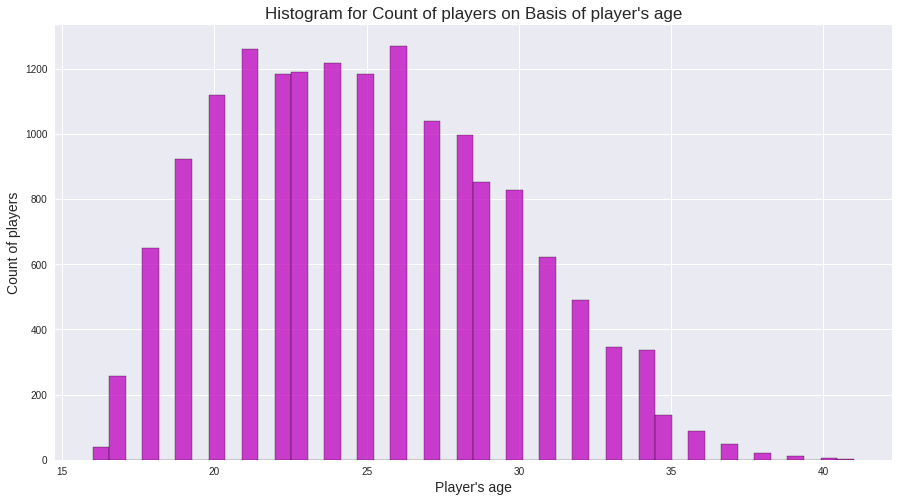

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


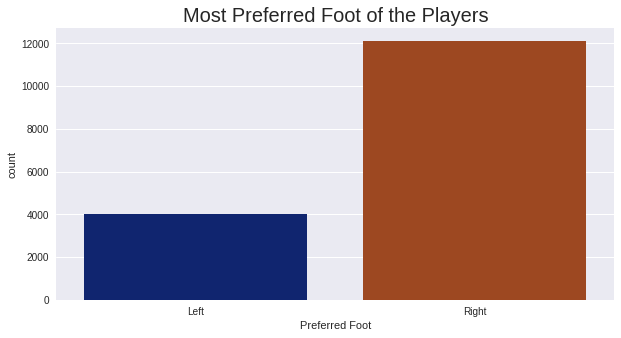

In [ ]:


# Plot histograms of count of players on the basis of height.

plt.figure(figsize = (13, 8))
ax = sns.histplot(x = 'Height', data= data)
ax.set_xlabel(xlabel = "Player\'s Height(in foot per inches) ", fontsize = 14)
ax.set_ylabel(ylabel = 'Count of players', fontsize = 14)
ax.set_title(label='Histogram for Count of players on Basis of player\'s Height', fontsize = 17)

plt.show()


# Plot histograms of count of players on the basis of Special Scores
plt.figure(figsize = (15, 8))
ax = sns.histplot(data.Special, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Player\'s Special score ", fontsize = 14)
ax.set_ylabel(ylabel = 'Count of players', fontsize = 14)
ax.set_title(label='Histogram for Count of players on Basis of Special Scores of the Players', fontsize = 17)
plt.show()


# Plot histograms of count of players on the basis of Age

plt.figure(figsize = (15,8))
ax = sns.histplot(data.Age,  color = 'm')
ax.set_xlabel(xlabel = "Player\'s age", fontsize = 14)
ax.set_ylabel(ylabel = 'Count of players', fontsize = 14)
ax.set_title(label = 'Histogram for Count of players on Basis of player\'s age', fontsize = 17)
# ax.set_axis_labels(x_var="Player\'s age", y_var="Count of players",fontsize = 14)
# ax.fig.suptitle('Histogram for Count of players on Basis of players age', fontsize = 17)
plt.show()


plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['Preferred Foot'], palette = 'dark')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

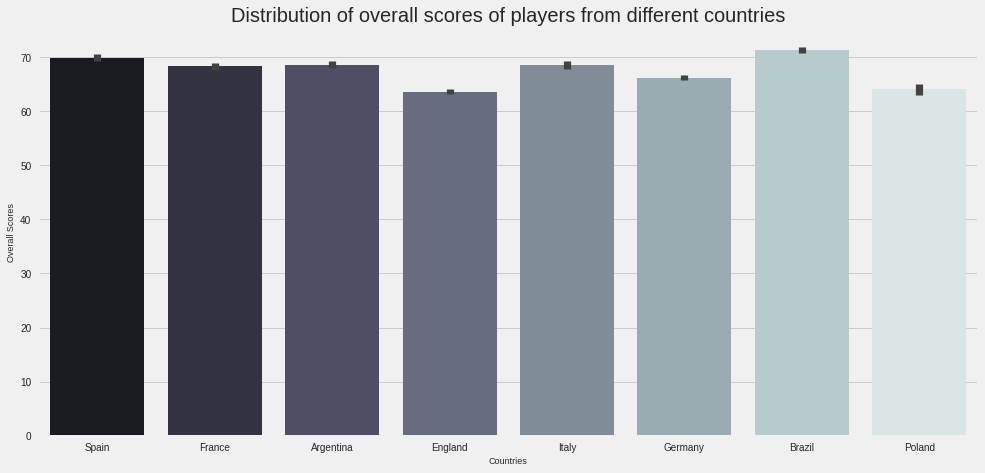

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


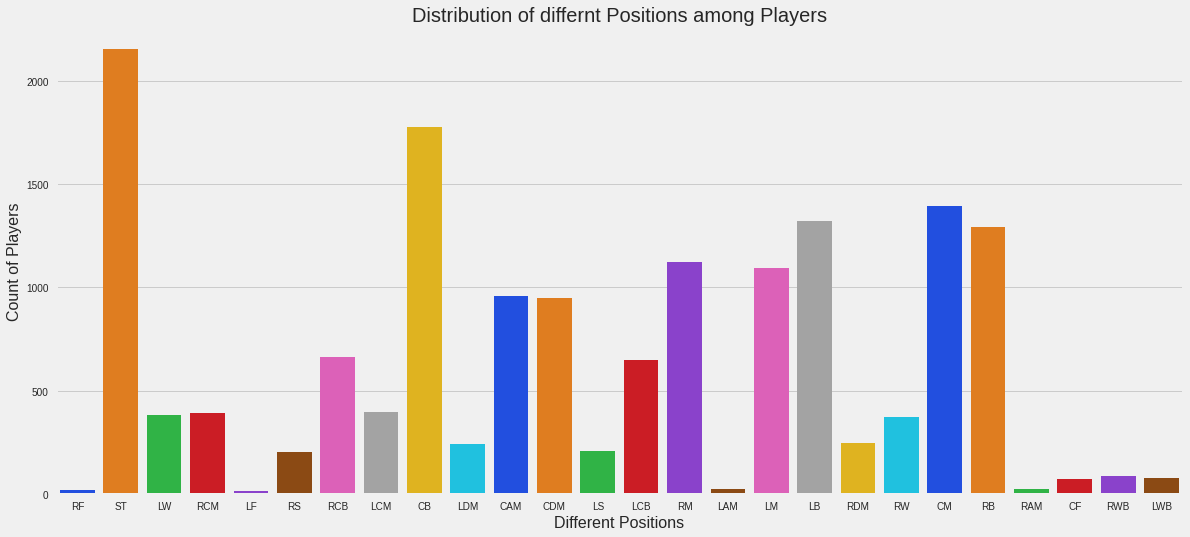

In [ ]:
#Distribution of players in different clubs/country on the basis of some attribute.

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Poland')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Overall']]

plt.figure(figsize = (15, 7))
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'bone')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Position', data = data, palette = 'bright')
ax.set_xlabel(xlabel = 'Different Positions', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Distribution of different Positions among Players', fontsize = 20)
plt.show()


In [ ]:
# Features of players according to their position.

#storing the given features in a list and checking its existence based on position

player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')


parti_feature={}
for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    parti_feature[i]=  list(val.nlargest(3,keep="first").index)
pd.DataFrame(parti_feature,index =['Feature-1', 'Feature-2','Feature-3'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app


,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Feature-1,Balance,Jumping,Aggression,Agility,Balance,Agility,Acceleration,Jumping,Balance,Aggression,Balance,Acceleration,Acceleration,Acceleration,Acceleration,Agility,Acceleration,Jumping,Agility,Aggression,Agility,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration
Feature-2,Agility,Aggression,Jumping,Balance,Agility,Balance,Balance,Aggression,Agility,BallControl,Agility,Agility,Agility,Agility,Agility,Balance,Balance,Aggression,Balance,Jumping,Acceleration,Agility,Agility,Agility,Agility,Jumping
Feature-3,Acceleration,HeadingAccuracy,Balance,Acceleration,Acceleration,Acceleration,Agility,HeadingAccuracy,BallControl,LongPassing,Acceleration,Balance,Finishing,Balance,Balance,Acceleration,Jumping,HeadingAccuracy,BallControl,BallControl,Balance,Balance,Jumping,Balance,Balance,Finishing


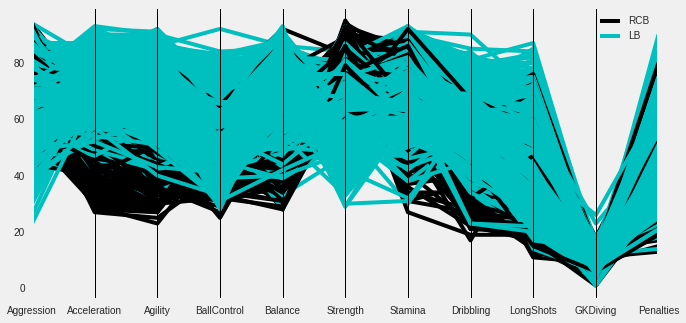

In [ ]:
datas = (data[(data['Position'].isin(["LB", "RCB"]))].loc[:, ['Position','Aggression','Acceleration','Agility','BallControl','Balance','Strength','Stamina','Dribbling','LongShots','GKDiving','Penalties']])
parallel_coordinates(datas, 'Position',color=['k','c'])

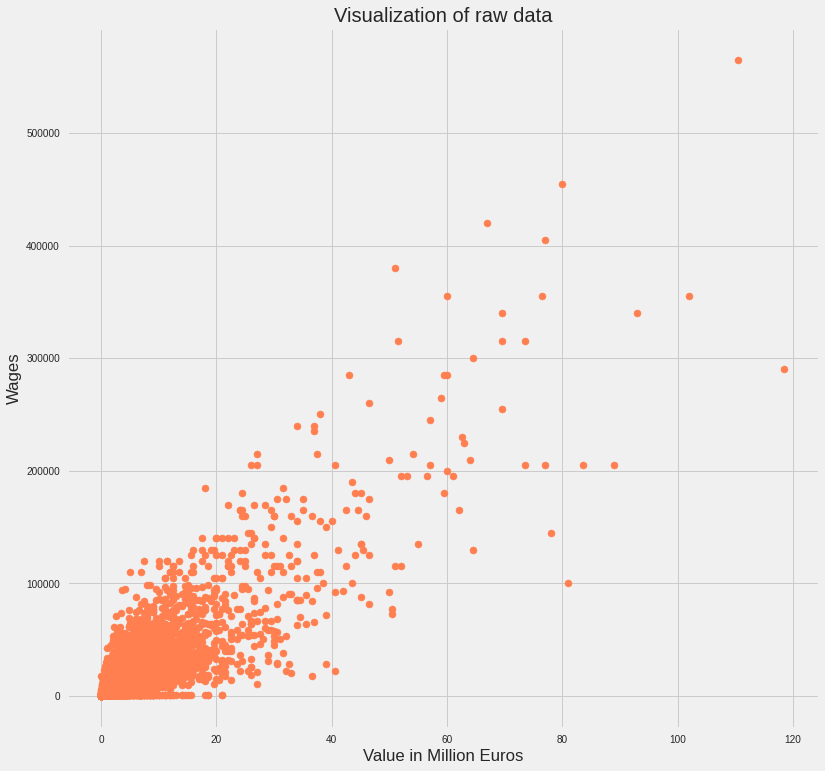

In [ ]:
#outliers

pay= data['Wage']
value = data['Value']/1000000
# weight = weight.apply(modifyWeight)    
plt.figure(figsize=(12, 12))
plt.scatter(value, pay,c='coral')
plt.xlabel('Value in Million Euros')
plt.ylabel('Wages')
plt.title('Visualization of raw data');


